In [1]:
%matplotlib widget

In [2]:
%cd ..

d:\Users\NitroPC\Documents\Python\ConcursoModelizacion2023


In [3]:
import numpy as np
import torch
import matplotlib.pyplot as plt

from gradient_descent import Environment, Agent, ConstrainedLoss, CostLoss, DistanceLoss, optimize
from utils import plot_location

In [4]:
K=35
dt = 1.
g = 0.1
m = 10.
F_max = 11.
p_0 = np.array([50., 50., 100.])
v_0 = np.array([-10., 0., -10.])
alpha = 0.5
gamma = 1.

In [5]:
agent = Agent(K)
env = Environment(dt, gamma, g, m, p_0, v_0)

In [6]:
loss = ConstrainedLoss(dt, gamma, F_max, alpha)
optim = torch.optim.RMSprop(agent.parameters(), lr=1e-0)
scheduler = torch.optim.lr_scheduler.ExponentialLR(optim, gamma=0.99)

In [14]:
optimize(env, agent, loss, optim, scheduler, iters=1000)

179.52310180664062 [4.2739534936551264e-05]
179.45541381835938 [1.564405203775484e-05]
179.45523071289062 [5.726228994379637e-06]
179.44985961914062 [2.0959850054794266e-06]
179.44964599609375 [7.67198298829217e-07]


179.45046997070312 [2.808193895412968e-07]
179.44949340820312 [1.0278897862871985e-07]
179.4494171142578 [3.762409050455422e-08]
179.44943237304688 [1.3771633935657849e-08]
179.449462890625 [5.0408634126267e-09]


In [8]:
f = agent()
p, v = env(f)

In [9]:
loss(f, p, v)

tensor(179.5231, grad_fn=<AddBackward0>)

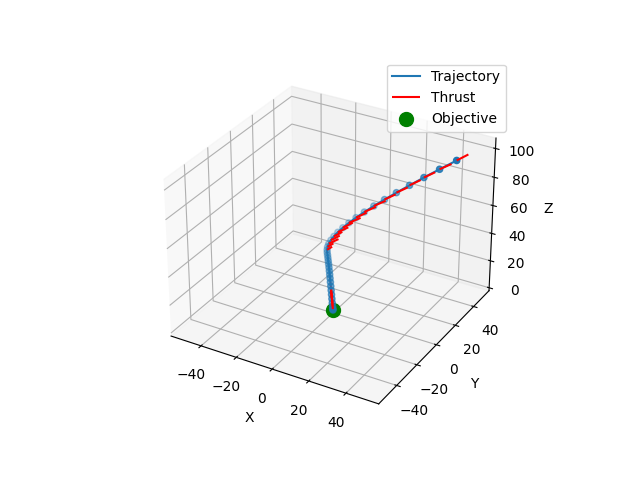

In [13]:
plot_location(f, p, v, lambd=1.)

In [11]:
d_loss = DistanceLoss()

In [12]:
d_loss(f, p, v)

(tensor(0.0032, grad_fn=<LinalgVectorNormBackward0>),
 tensor(0.0003, grad_fn=<LinalgVectorNormBackward0>))